In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

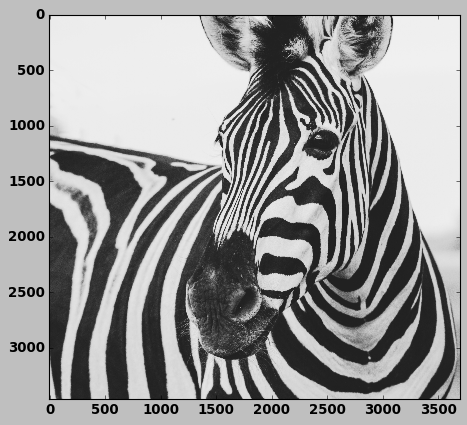

In [2]:
# Una imagen de la fotografa Frida Bredesen de una Cebra
plt.style.use('classic')
imagen = Image.open(".\\imagenes\\imagen_ejemplo_frida_bredesen.jpg")
plt.imshow(imagen)

In [3]:
# Vamos a convertir la imagen a una escala de grises
imagen_gr = imagen.convert('LA')
# Ahora podemos convertir la imagen en un array de numpy
imagen_mat = np.array(list(imagen_gr.getdata(band=0)), float)
# Le damos nuevamente la forma original
imagen_mat.shape = (imagen_gr.size[1], imagen_gr.size[0])

In [4]:
# Calculemos la descomposicion SVD
U, D, V = np.linalg.svd(imagen_mat)

In [5]:
# Revisemos las dimensions de nuestras matrices
print(imagen_mat.shape)
print(U.shape)
print(D.shape)
print(V.shape)

(3456, 3693)
(3456, 3456)
(3456,)
(3693, 3693)


In [6]:
# Recordemos que D tiene los valores singulares que debemos poner en una matriz diagonal 

# No necesitamos transponer a V

# Los vectores singulares y valores singulares estan ordenados de manera que los primeros son los que mas varianza
# explican o sea los valores que contienen mas informacion. Es por eso que usando los primeros valores de estas 
# matrices podremos reconstruir gran parte de la imagen, al menos para darnos cuenta del contenido.

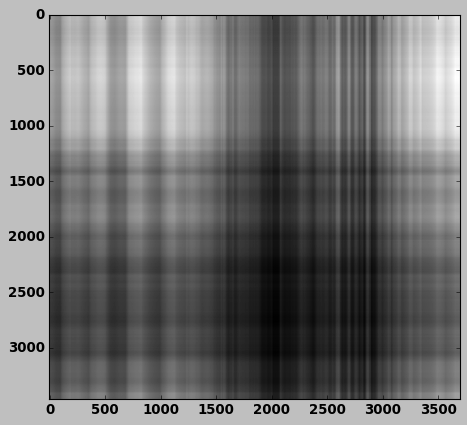

In [7]:
# Podemos calcular una aproximacion de la imagen usando la primer columna de U y la primer fila de V, estos 
# elementos capturan la informacion mas importante

imagen_recons = np.matrix(U[:, :1]) * np.diag(D[:1]) * np.matrix(V[:1, :])
plt.imshow(imagen_recons, cmap='gray')

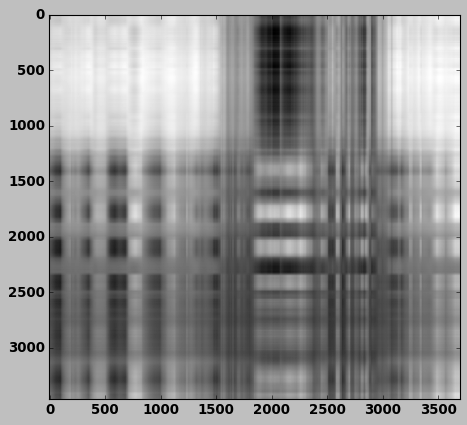

In [8]:
# Podemos calcular una aproximacion de la imagen usando la primer columna de U y la primer fila de V, estos 
# elementos capturan la informacion mas importante

imagen_recons = np.matrix(U[:, :2]) * np.diag(D[:2]) * np.matrix(V[:2, :])
plt.imshow(imagen_recons, cmap='gray')